# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Luthfi Hanif
- **Email:** luthfihanif70@gmail.com
- **ID Dicoding:** luthfihanif

## Menentukan Pertanyaan Bisnis

Berdasarkan beberapa permasalahan yang ingin diselesaikan, didefinisikan beberapa pertanyaan bisnis seperti berikut.
- Bagaimana pengaruh season(musim) terhadap jumlah penyewaan sepeda?
- Bagaimana perbandingan antara casual user dengan registered user pada pada kondisi working day dan bukan? Apa kesimpulannya?
- Bagaimana pengaruh cuaca terhadap penyewaan sepeda harian?
- Pada kondisi dan situasi apa penyewaan sepeda paling banyak?

## Import Semua Packages/Library yang Digunakan

In [281]:
# Import semua library yang dibutuhkan untuk pengerjaan Proyek Analisis Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Proses atau kumpulan kegiatan yang meliputi pengumpulan data (gathering data), penilaian data (assessing data), serta pembersihan data (cleaning data) sebelum data digunakan dalam proses analisis data

### Gathering Data

#### Memuat Tabel day.csv

In [282]:
# Memuat tabel day.csv menjadi sebuah dataframe
day_df = pd.read_csv("./data/day.csv")
day_df.head(10) # Menampilkan 10 baris pertama dari DataFrame day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


#### Memuat Tabel hour.csv

In [283]:
# Memuat tabel hour.csv menjadi sebuah dataframe
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head(10) # Menampilkan 10 baris pertama dari DataFrame hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


#### Menampilkan Jumlah Record(Baris) pada Setiap DataFrame

In [284]:
print("Total records(baris) pada day_df: {}".format(len(day_df))) # Menampilkan jumlah record (baris) pada DataFrame day_df
print("Total records(baris) pada hour_df: {}".format(len(hour_df))) # Menampilkan jumlah record (baris) pada DataFrame hour_df

Total records(baris) pada day_df: 731
Total records(baris) pada hour_df: 17379


**Insight:**
- Pada tahapan Gathering Data, dikumpulkan semua data yang dibutuhkan
- Terdapat dua DataFrame yang digunakan yaitu day_df dan hour_df
- DataFrame day_df menampilkan jumlah penggunaan sepeda yang diagregasi setiap hari
- DataFrame hour_df menampilkan jumlah penggunaan sepeda yang diagregasi setiap jam
- Total records pada DataFrame day_df yaitu 731
- Total records pada DataFrame hour_df yaitu 17379

### Assessing Data

Pada proses ini akan dinilai kualitas dari seluruh data yang akan digunakan

#### Menilai Data day_df

In [285]:
# Memeriksa tipe data dari tiap kolom yang terdapat dalam day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [286]:
# Memeriksa missing values pada setiap kolom dalam DataFrame day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [287]:
# Memeriksa jumlah duplikasi dalam DataFrame day_df
print("Jumlah duplikasi pada day_df: {}".format(day_df.duplicated().sum()))

Jumlah duplikasi pada day_df: 0


In [288]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour_df

In [289]:
# Memeriksa tipe data dari tiap kolom yang terdapat dalam hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [290]:
# Memeriksa missing values pada setiap kolom dalam DataFrame hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [291]:
# Memeriksa jumlah duplikasi dalam DataFrame hour_df
print("Jumlah duplikasi pada hour_df: {}".format(hour_df.duplicated().sum()))

Jumlah duplikasi pada hour_df: 0


In [292]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada DataFrame day_df, datatype column dteday seharusnya 'datetime'
- Pada DataFrame hour_df, datatype column dteday seharusnya 'datetime'
- Tidak terdapat missing value untuk setiap column dalam setiap DataFrame
- Tidak terdapat duplicate data untuk setiap data dalam DataFrame
- Pada kedua DataFrame, column "instant" hanya menggambarkan urutan data sehingga tidak diperlukan
- Penggunaan tipe data integer yang mewakili suatu kategori menyebabkan data lebih sulit untuk dipahami. Pengguna hanya akan mengerti jika memahami konteks data dan kategori yang diwakili oleh penggunaan integer
- Pada DataFrame hour_df, column "season", "yr", "mnth", "holiday", "weekday", "workingday" tidak berguna karena nilainya sama untuk setiap harinya, sehingga dapat mengacu pada DataFrame day_df untuk "dteday" yang sesuai


### Cleaning Data

Pada proses ini akan dilakukan pembersihan berbagai masalah yang telah teridentifikasi dalam proses assessing data

Berikut merupakan beberapa proses Cleaning Data yang akan dilakukan.
- Menghapus column "instant" karena tidak diperlukan untuk setiap DataFrame
- Menghapus column "season", "yr", "mnth", "holiday", "weekday", dan "workingday" pada DataFrame hour_df
- Mengubah tipe data column "dteday" menjadi "datetime"
- Mengubah beberapa column yang menggunakan representasi integer untuk mewakili kategori tertentu. Pada kedua DataFrame tersebut, menurut saya column "season" dan "weathersit" perlu diubah menjadi tipe data category. Tipe data category digunakan untuk mengoptimalkan penyimpanan dan operasi pada kolom yang memiliki jumlah unique value terbatas
- Mengkonversi isi column "season" dan "weathersit" menyesuaikan dengan perubahan tipe data

#### Membersihkan Data day_df

##### Drop Column

In [293]:
# Menghapus column "instant" pada DataFrame day_df
day_df.drop(['instant'], axis=1, inplace=True)

##### Mengganti Tipe Data

In [294]:
# Mengubah tipe data column "dteday" menjadi datetime
# object to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [295]:
# Mengubah tipe data column "season" dan "weathersit" menjadi category
# int to category
columns = ['season', 'weathersit']

for column in columns:
    day_df[column] = day_df[column].astype('category')

##### Mengkonversi Data

In [296]:
# Mengkonversi isi column "season" dan "weathersit" menyesuaikan dengan perubahan tipe data

# Konversi column "season"
# 1: springer
# 2: summer
# 3: fall
# 4: winter
day_df['season'].replace((1, 2, 3, 4), ('springer', 'summer', 'fall', 'winter'), inplace=True)

# Konversi column "weathersit"
# 1: clear
# 2: mist
# 3: light_rain_snow
# 4: heavy_rain_snow
day_df['weathersit'].replace((1, 2, 3, 4), ('clear', 'mist', 'light_rain_snow', 'heavy_rain_snow'), inplace=True)

#### Membersihkan Data hour_df

##### Drop Column

In [297]:
# Menghapus column "instant" pada DataFrame hour_df
hour_df.drop(['instant'], axis=1, inplace=True)

In [298]:
# Menghapus column "season", "yr", "mnth", "holiday", "weekday", dan "workingday" pada DataFrame hour_df
hour_df.drop(['season'], axis=1, inplace=True)
hour_df.drop(['yr'], axis=1, inplace=True)
hour_df.drop(['mnth'], axis=1, inplace=True)
hour_df.drop(['holiday'], axis=1, inplace=True)
hour_df.drop(['weekday'], axis=1, inplace=True)
hour_df.drop(['workingday'], axis=1, inplace=True)

##### Mengganti Tipe Data

In [299]:
# Mengubah tipe data column "dteday" menjadi datetime
# object to datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [300]:
# Mengubah tipe data column "weathersit" menjadi category
# integer to category 
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

##### Mengkonversi Data

In [301]:
# Mengkonversi isi column "weathersit" menyesuaikan dengan perubahan tipe data

# Konversi column "weathersit"
# 1: clear
# 2: mist
# 3: light_rain_snow
# 4: heavy_rain_snow
hour_df['weathersit'].replace((1, 2, 3, 4), ('clear', 'mist', 'light_rain_snow', 'heavy_rain_snow'), inplace=True)

#### Menampilkan Hasil Cleaning Data

In [302]:
# Menampilkan 10 baris pertama dari DataFrame day_df setelah dibersihkan
day_df.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,springer,0,1,0,6,0,mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,springer,0,1,0,0,0,mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,springer,0,1,0,1,1,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,springer,0,1,0,2,1,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,springer,0,1,0,3,1,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,2011-01-06,springer,0,1,0,4,1,clear,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,2011-01-07,springer,0,1,0,5,1,mist,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,2011-01-08,springer,0,1,0,6,0,mist,0.165000,0.162254,0.535833,0.266804,68,891,959
8,2011-01-09,springer,0,1,0,0,0,clear,0.138333,0.116175,0.434167,0.361950,54,768,822
9,2011-01-10,springer,0,1,0,1,1,clear,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [303]:
# Menampilkan tipe data dari DataFrame day_df setelah dibersihkan
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: category(2), datetime64[ns](1), float64(4), int64(8)
memory usage: 76.1

In [304]:
# Menampilkan 10 baris pertama dari DataFrame hour_df setelah dibersihkan
hour_df.head(10)

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,2,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,3,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,4,clear,0.24,0.2879,0.75,0.0000,0,1,1
5,2011-01-01,5,mist,0.24,0.2576,0.75,0.0896,0,1,1
6,2011-01-01,6,clear,0.22,0.2727,0.80,0.0000,2,0,2
7,2011-01-01,7,clear,0.20,0.2576,0.86,0.0000,1,2,3
8,2011-01-01,8,clear,0.24,0.2879,0.75,0.0000,1,7,8
9,2011-01-01,9,clear,0.32,0.3485,0.76,0.0000,8,6,14


In [305]:
# Menampilkan tipe data dari DataFrame hour_df setelah dibersihkan
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   hr          17379 non-null  int64         
 2   weathersit  17379 non-null  category      
 3   temp        17379 non-null  float64       
 4   atemp       17379 non-null  float64       
 5   hum         17379 non-null  float64       
 6   windspeed   17379 non-null  float64       
 7   casual      17379 non-null  int64         
 8   registered  17379 non-null  int64         
 9   cnt         17379 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(4), int64(4)
memory usage: 1.2 MB


**Insight:**
- Cleaning Data berdasarkan proses yang telah ditetapkan di awal telah berhasil dilakukan
- Dapat dilihat bahwa memory usage untuk setiap DataFrame berkurang dengan cukup drastis namun setiap tetap menyimpan informasi yang sama dan diperlukan

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [306]:
# Menampilkan rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,fall,NaN,NaN,NaN,NaN,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [307]:
# Menampilkan jumlah penyewaan sepeda untuk setiap "season"
day_df.groupby(by="season", observed=False).agg({
    "cnt": ["sum", "max", "min", "mean"]
}).sort_values(by=("cnt", "sum"), ascending=False).reset_index().rename(columns={
    ("season"): "Season",
    ("cnt"): "Count",
    ("sum"): "Total",
    ("max"): "Max_per_Day",
    ("min"): "Min_per_Day",
    ("mean"): "Mean_per_Day"
})

Season    Count                                     
               Total Max_per_Day Min_per_Day Mean_per_Day
0      fall  1061129        8714        1115  5644.303191
1    summer   918589        8362         795  4992.331522
2    winter   841613        8555          22  4728.162921
3  springer   471348        7836         431  2604.132597

Berdasarkan data pada tabel di atas, dapat diketahui bahwa jumlah penyewaan sepeda paling banyak terjadi pada season(musim) "fall" dengan total 1061129. Sementara itu, jumlah penyewaan sepeda paling sedikit terjadi pada season(musim) "springer" dengan total 471348. Jumlah penyewaan sepeda terbanyak per hari mencapai 8714

In [308]:
# Menampilkan jumlah penyewaan sepeda pada Working Day dan bukan
day_df.groupby(by="workingday").agg({
    "cnt": ["sum", "max", "min", "mean"]
}).reset_index().rename(columns={
    ("workingday"): "is_Working_Day",
    ("cnt"): "Count",
    ("sum"): "Total",
    ("max"): "Max_per_Day",
    ("min"): "Min_per_Day",
    ("mean"): "Mean_per_Day",
}).replace({
    0: 'No', 1: 'Yes'
})

is_Working_Day    Count                                     
                    Total Max_per_Day Min_per_Day Mean_per_Day
0             No  1000269        8714         605  4330.168831
1            Yes  2292410        8362          22  4584.820000

Berdasarkan data pada tabel di atas, dapat diketahui bahwa rata-rata jumlah penyewaan sepeda per hari pada "Working Day" mencapai 4584. Sementara pada "Non-Working Day" mencapai 4330

In [309]:
# Menampilkan jumlah casual user dan registered user pada kondisi Working Day dan bukan
day_df.groupby(by="workingday").agg({
    "registered": ["sum", "mean"],
    "casual": ["sum", "mean"]
}).reset_index().rename(columns={
    ("workingday"): "is_Working_Day",
    ("registered"): "Registered_User",
    ("casual"): "Casual_User",
    ("sum"): "Total",
    ("mean"): "Mean_per_Day"
}).replace({
    0: 'No', 1: 'Yes'
})

is_Working_Day Registered_User              Casual_User             
                           Total Mean_per_Day       Total Mean_per_Day
0             No          683537  2959.034632      316732  1371.134199
1            Yes         1989125  3978.250000      303285   606.570000

Berdasarkan data pada tabel di atas, dapat diketahui bahwa pada "Working Day", rata-rata jumlah "Registered User" mencapai 3978, sementara itu "Casual User" hanya 606. Sedangkan pada "Non-Working Day" perbedaannya tidak terlalu jauh. Hal ini berarti, pengguna yang menggunakan sepeda secara berulang pada "Working Day" untuk keperluan alat transportasi cenderung mendaftarkan diri untuk menjadi "Registered User"

In [310]:
# Menampilkan jumlah penyewaan sepeda berdasarkan kondisi cuaca harian
day_df.groupby(by="weathersit", observed=False).agg({
    "cnt": ["mean"]
}).reset_index().rename(columns={
    "weathersit": "Weather_Situation",
    "cnt": "Count",
    "mean": "Mean_per_Day"
})

,Weather_Situation,Count
,,Mean_per_Day
0,clear,4876.786177
1,mist,4035.862348
2,light_rain_snow,1803.285714


Berdasarkan data pada tabel di atas, dapat diketahui bahwa jumlah penyewaan sepeda cenderung meningkat pada kondisi cuaca yang cerah ("Weather_Situation" == "clear")

### Explore Data hour_df

In [311]:
# Menampilkan rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,11.546752,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,6.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,12.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,18.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,23.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [312]:
# Menampilkan jumlah dan rata-rata penyewaan sepeda berdasarkan jam
hour_df.groupby(by="hr").agg({
    "cnt": ["sum", "mean"]
}).sort_values(by=("cnt", "sum"), ascending=False).reset_index().rename(columns={
    "hr": "Hours",
    "cnt": "Count",
    "sum": "Total",
    "mean": "Mean"
})

Hours   Count            
           Total        Mean
0     17  336860  461.452055
1     18  309772  425.510989
2      8  261001  359.011004
3     16  227748  311.983562
4     19  226789  311.523352
5     13  184919  253.661180
6     12  184414  253.315934
7     15  183149  251.233196
8     14  175652  240.949246
9     20  164550  226.030220
10     9  159438  219.309491
11     7  154171  212.064649
12    11  151320  208.143054
13    10  126257  173.668501
14    21  125445  172.314560
15    22   95612  131.335165
16    23   63941   87.831044
17     6   55132   76.044138
18     0   39130   53.898072
19     1   24164   33.375691
20     2   16352   22.869930
21     5   14261   19.889819
22     3    8174   11.727403
23     4    4428    6.352941

Berdasarkan data pada tabel di atas, dapat diketahui bahwa jumlah penyewaan sepeda terbanyak yaitu pada pukul 17.00, 18.00, dan 08.00. Jika diasumsikan jam kerja berada pada rentang 9-17, berarti jumlah penyewaan sepeda terbanyak terjadi pada saat sebagian besar pengguna berangkat dan pulang kerja

**Insight:**
- Jumlah penyewaan sepeda paling banyak terjadi pada season(musim) "fall" dengan total 1061129 
- Jumlah penyewaan sepeda paling sedikit terjadi pada season(musim) "springer" dengan total 471348
- Jumlah penyewaan sepeda terbanyak per hari mencapai 8714
- Rata-rata jumlah penyewaan sepeda per hari pada "Working Day" mencapai 4584
- Rata-rata jumlah penyewaan sepeda per hari pada "Non-Working Day" mencapai 4330
- Pada "Working Day", rata-rata jumlah "Registered User" mencapai 3978, sementara itu "Casual User" hanya 606. Sedangkan pada "Non-Working Day" perbedaannya tidak terlalu jauh. Hal ini berarti, pengguna yang menggunakan sepeda secara berulang pada "Working Day" untuk keperluan alat transportasi cenderung mendaftarkan diri untuk menjadi "Registered User"
- Jumlah penyewaan sepeda cenderung meningkat pada kondisi cuaca yang cerah ("Weather_Situation" == "clear")
- Jumlah penyewaan sepeda terbanyak yaitu pada pukul 17.00, 18.00, dan 08.00. Jika diasumsikan jam kerja berada pada rentang 9-17, berarti jumlah penyewaan sepeda terbanyak terjadi pada saat sebagian besar pengguna berangkat dan pulang kerja

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh season(musim) terhadap jumlah penyewaan sepeda?

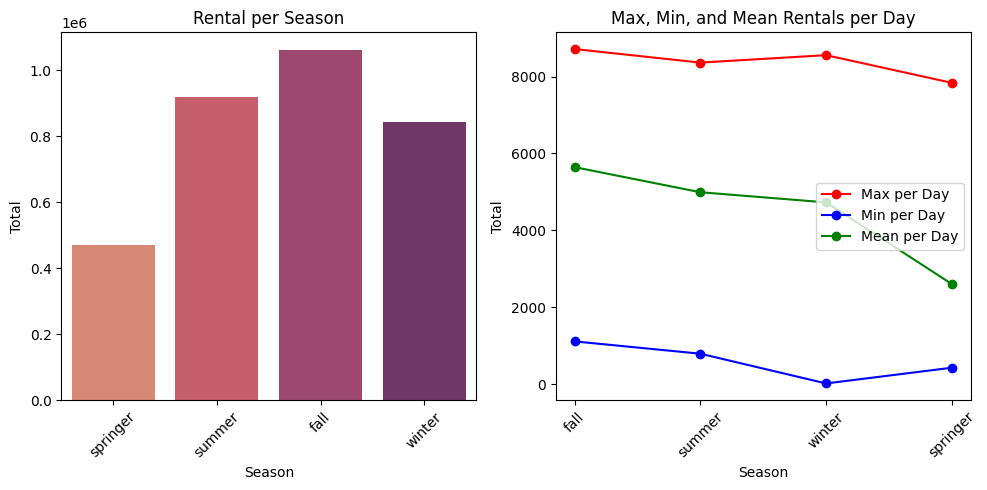

In [313]:
# Melakukan agregasi terhadap DataFrame day_df berdasarkan column "season"
# Assign hasil aggregasi ke dalam suatu variabel
agg_day_df = day_df.groupby(by="season", observed=False).agg({
                "cnt": ["sum", "max", "min", "mean"]
            }).sort_values(by=("cnt", "sum"), ascending=False).reset_index().rename(columns={
                ("season"): "Season",
                ("cnt"): "Count",
                ("sum"): "Total",
                ("max"): "Max_per_Day",
                ("min"): "Min_per_Day",
                ("mean"): "Mean_per_Day"
            })

# Data Visualization
plt.figure(figsize=(10, 5)) # Membuat new figure

# Membuat Bar Chart untuk menampilkan total penyewaan sepeda untuk setiap musimnya
# Plot posisi chart pada figure
plt.subplot(1, 2, 1)  # Bar Chart di-plot pada row-1, column-2, index-1
sns.barplot(data=agg_day_df, x="Season", y=("Count", "Total"), hue="Season", palette="flare", legend=False)
plt.title("Rental per Season")
plt.xlabel("Season")
plt.ylabel("Total")
plt.xticks(rotation=45)

# Membuat Line Chart untuk menampilkan maksimal dan minimal total penyewaan sepeda per-hari untuk setiap musim dan rata-rata penyewaan harian
# Plot posisi chart pada figure
plt.subplot(1, 2, 2)  # Line Chart di-plot pada row-1, column-2, index-2
plt.plot(agg_day_df["Season"], agg_day_df[("Count", "Max_per_Day")], marker="o", label="Max per Day", color="red")
plt.plot(agg_day_df["Season"], agg_day_df[("Count", "Min_per_Day")], marker="o", label="Min per Day", color="blue")
plt.plot(agg_day_df["Season"], agg_day_df[("Count", "Mean_per_Day")], marker="o", label="Mean per Day", color="green")

plt.title("Max, Min, and Mean Rentals per Day")
plt.xlabel("Season")
plt.ylabel("Total")
plt.xticks(rotation=45)
plt.legend(loc="right")

# Menampilkan grafik
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat dilihat visualisasi perbandingan jumlah penyewaan sepeda untuk setiap season(musim). Jumlah penyewaan sepeda terbanyak yaitu pada season "fall" dan yang paling sedikit pada season "springer". Kemudian, berdasarkan Line Chart "Max, Min, dan Mean Rentals per Day" dapat dilihat bahwa rata-rata jumlah penyewaan sepeda per hari pada season "fall", "summer", dan "winter" tidak terlalu jauh berbeda. Sementara itu, jika dibandingkan dengan season "springer", rata-rata jumlah penyewaan sepeda per hari cukup rendah

### Pertanyaan 2: Bagaimana perbandingan antara casual user dengan registered user pada kondisi working day dan bukan? Apa kesimpulannya?

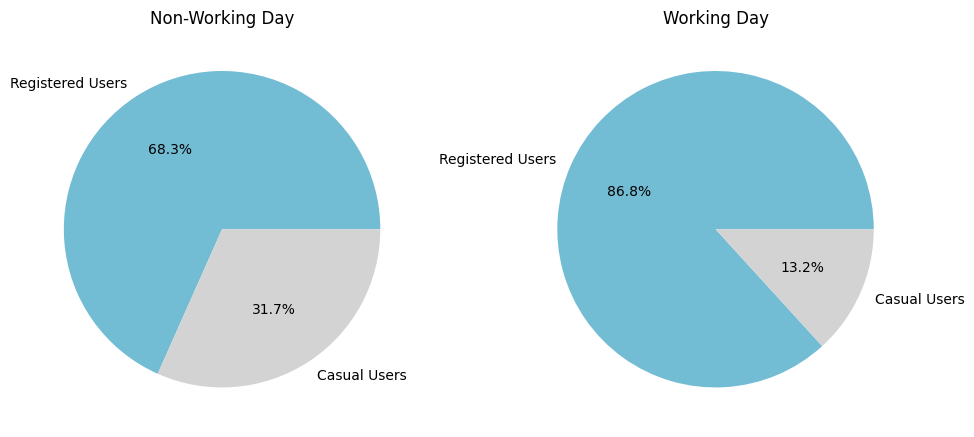

In [314]:

agg2_day_df = day_df.groupby(by="workingday").agg({
                "registered": ["sum", "mean"],
                "casual": ["sum", "mean"]
            }).reset_index().rename(columns={
                ("workingday"): "is_Working_Day",
                ("registered"): "Registered_User",
                ("casual"): "Casual_User",
                ("sum"): "Total",
                ("mean"): "Mean_per_Day"
            }).replace({
                0: "No", 1: "Yes"
            })

# Data Visualization
plt.figure(figsize=(10, 5)) # Membuat new figure

no_working_day_data = agg2_day_df[agg2_day_df["is_Working_Day"] == "No"]
yes_working_day_data = agg2_day_df[agg2_day_df["is_Working_Day"] == "Yes"]
labels = ["Registered Users", "Casual Users"]
colors = ["#72BCD4", "#D3D3D3"]

# Membuat Pie Chart untuk menampilkan perbandingan rata-rata penyewaan sepeda
# pada Not Working Day antara Registered User dengan Casual User
# Plot posisi chart pada figure
plt.subplot(1, 2, 1)  # Bar Chart di-plot pada row-1, column-2, index-1
plt.pie([no_working_day_data[("Registered_User", "Mean_per_Day")].values[0], no_working_day_data[("Casual_User", "Mean_per_Day")].values[0]],
        labels=labels, 
        autopct='%1.1f%%', 
        colors=colors)
plt.title("Non-Working Day")

# Membuat Pie Chart untuk menampilkan perbandingan rata-rata penyewaan sepeda
# pada Working Day antara Registered User dengan Casual User
# Plot posisi chart pada figure
plt.subplot(1, 2, 2)  # Bar Chart di-plot pada row-1, column-2, index-1
plt.pie([yes_working_day_data[("Registered_User", "Mean_per_Day")].values[0], yes_working_day_data[("Casual_User", "Mean_per_Day")].values[0]],
        labels=labels, 
        autopct='%1.1f%%', 
        colors=colors)
plt.title("Working Day")

# Menampilkan grafik
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat dilihat visualisasi perbandingan antara "Registered User" dengan "Casual User" pada "Non-Worklng Day" dan "Working Day". Kesimpulannya, berdasarkan yang telah dijelaskan pada bagian Exploratory Data Analysis bahwa pengguna yang menggunakan sepeda secara berulang pada "Working Day" untuk keperluan alat transportasi cenderung mendaftarkan diri untuk menjadi "Registered User" 

### Pertanyaan 3: Bagaimana pengaruh cuaca terhadap penyewaan sepeda harian?

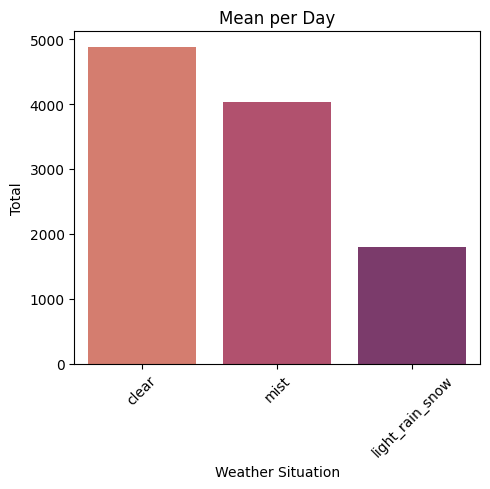

In [315]:
# Melakukan agregasi terhadap DataFrame day_df berdasarkan column "season"
# Assign hasil aggregasi ke dalam suatu variabel
agg3_day_df = day_df.groupby(by="weathersit", observed=False).agg({
                "cnt": ["mean"]
            }).reset_index().rename(columns={
                "weathersit": "Weather_Situation",
                "cnt": "Count",
                "mean": "Mean_per_Day"
            })

# Data Visualization
plt.figure(figsize=(5, 5)) # Membuat new figure

# Membuat Bar Chart untuk menampilkan rata-rata penyewaan sepeda harian berdasarkan kondisi cuaca
sns.barplot(data=agg3_day_df, x="Weather_Situation", y=("Count", "Mean_per_Day"), hue="Weather_Situation", palette="flare", legend=False)
plt.title("Mean per Day")
plt.xlabel("Weather Situation")
plt.ylabel("Total")
plt.xticks(rotation=45)

# Menampilkan grafik
plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, dapat dilihat visualisasi perbandingan rata-rata jumlah penyewaan sepeda per hari untuk setiap "Weather Situation". Jumlah penyewaan sepeda tertinggi ketika kondisi cuaca cerah

### Pertanyaan 4: Pada kondisi dan situasi apa penyewaan sepeda paling banyak?

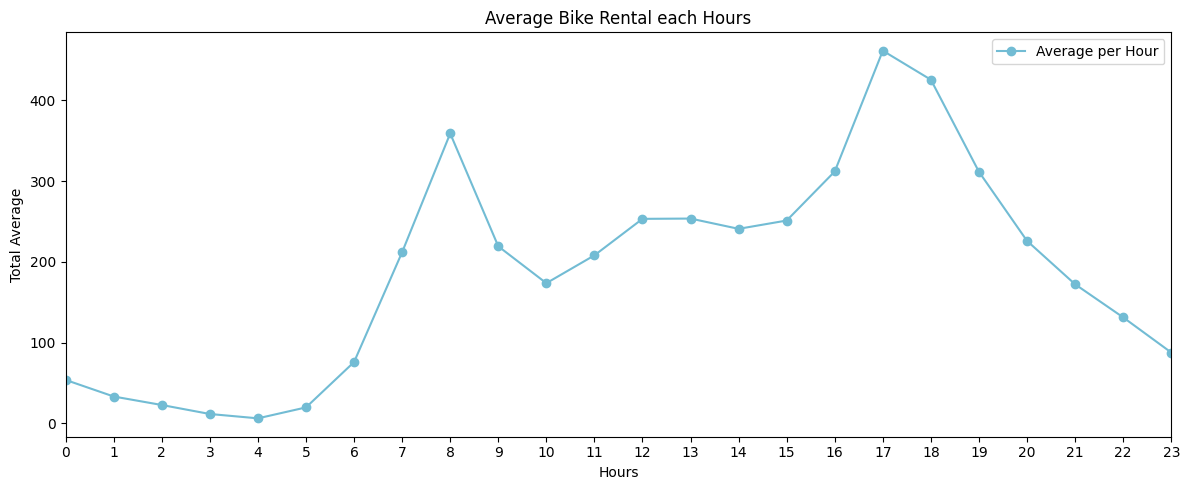

In [316]:
# Melakukan agregasi terhadap DataFrame day_df berdasarkan column "season"
# Assign hasil aggregasi ke dalam suatu variabel
agg4_day_df = hour_df.groupby(by="hr").agg({
                "cnt": ["sum", "mean"]
            }).reset_index().rename(columns={
                "hr": "Hours",
                "cnt": "Count",
                "sum": "Total",
                "mean": "Mean"
            })
            
# Data Visualization
plt.figure(figsize=(12, 5)) # Membuat new figure

# Membuat Line Chart untuk menampilkan rata-rata penyewaan sepeda untuk setiap jam
plt.plot(agg4_day_df["Hours"], agg4_day_df[("Count", "Mean")], marker="o", label="Average per Hour", color="#72BCD4")
plt.xticks(ticks=range(24), labels=range(24))
plt.xlim(0, 23)

plt.title("Average Bike Rental each Hours")
plt.xlabel("Hours")
plt.ylabel("Total Average")
plt.legend(loc="upper right")

# Menampilkan grafik
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat dilihat visualisasi rata-rata jumlah penyewaan sepeda untuk setiap jam. Rata-rata jumlah penyewaan tertinggi yaitu pada pukul 17

**Insight:**
- Musim berpengaruh terhadap jumlah penyewaan sepeda. Pada musim fall, summer, dan winter, jumlah penyewaan sepeda lebih banyak dibanding pada musim springer. Dengan demikian, dibutuhkan alokasi sumber daya yang lebih besar untuk dapat memenuhi kebutuhan pengguna pada musim tersebut
- Pengguna yang melakukan penyewaan sepeda pada "Working Day" sebagian besar merupakan "Registered User". Dengan kata lain, pengguna tersebut merupakan pengguna yang melakukan penyewaan sepeda secara berulang. Pengguna yang tergolong dalam tipe tersebut perlu dijaga kepuasannya (satisfaction) untuk mempertahankan jumlah customer dam retention rate
- Kondisi cuaca juga mempengaruhi jumlah penyewaan sepeda. Jumlah penyewaan meningkat ketika kondisi cuaca cerah. Dengan demikian, pada situasi tersebut perlu dipastikan bahwa tersedia alokasi sumber daya yang cukup untuk dapat memenuhi permintaan penyewaan sepeda dari pelanggan
- Kondisi dan situasi dimana jumlah penyewaan sepeda paling banyak yaitu terjadi pada season(musim) "fall", weather situation(kondisi cuaca) "clear", dan pukul 17-18. Kondisi atau situasi yang memenuhi kriteria tersebut dapat dioptimalkan untuk meningkatkan jumlah customer dan revenue

## Analisis Lanjutan (Opsional)

### Clustering

Bertujuan untuk mengelompokkan data ke dalam grup berdasarkan karakteristik tertentu tanpa menggunakan algoritma machine learning

##### Manual Grouping

Menentukan kriteria pengelompokan, dalam hal ini adalah mnth(bulan)

In [317]:
# Pengelompokan jumlah penyewaan sepeda untuk setiap bulan pada setiap tahun
day_df.groupby(by=['yr', 'mnth']).agg({
    "cnt": ["sum", "mean"]
}).reset_index().rename(columns={
    "yr": "Year",
    "mnth": "Month",
    "cnt": "Count",
    "sum": "Total",
    "mean": "Mean"
})

Year Month   Count             
                Total         Mean
0     0     1   38189  1231.903226
1     0     2   48215  1721.964286
2     0     3   64045  2065.967742
3     0     4   94870  3162.333333
4     0     5  135821  4381.322581
5     0     6  143512  4783.733333
6     0     7  141341  4559.387097
7     0     8  136691  4409.387097
8     0     9  127418  4247.266667
9     0    10  123511  3984.225806
10    0    11  102167  3405.566667
11    0    12   87323  2816.870968
12    1     1   96744  3120.774194
13    1     2  103137  3556.448276
14    1     3  164875  5318.548387
15    1     4  174224  5807.466667
16    1     5  195865  6318.225806
17    1     6  202830  6761.000000
18    1     7  203607  6567.967742
19    1     8  214503  6919.451613
20    1     9  218573  7285.766667
21    1    10  198841  6414.225806
22    1    11  152664  5088.800000
23    1    12  123713  3990.741935

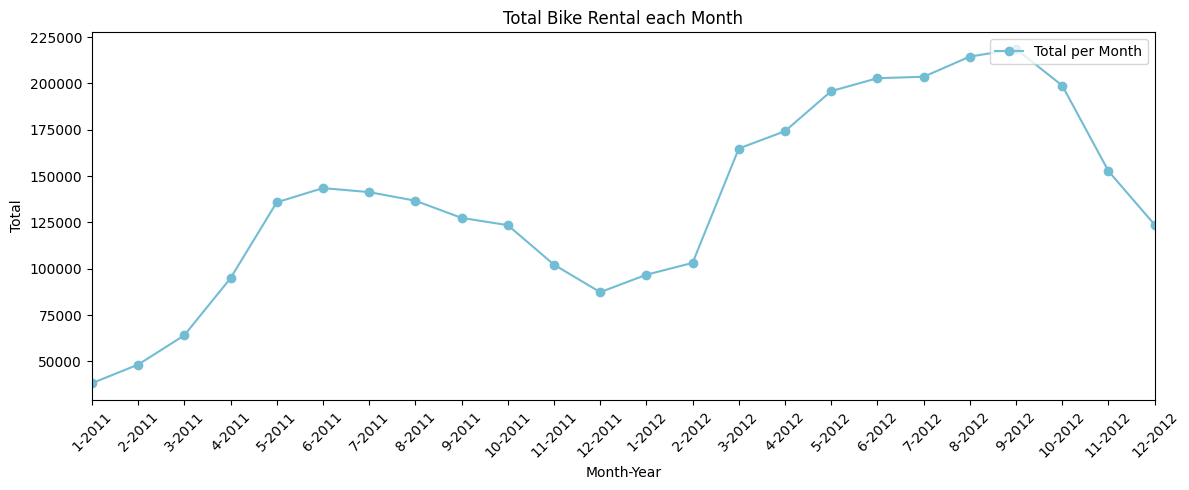

In [318]:
# Menampilkan data jumlah penyewaan sepeda untuk setiap bulan pada setiap tahun dalam bentuk grafik
agg5_day_df = day_df.groupby(by=['yr', 'mnth']).agg({
                "cnt": ["sum", "mean"]
            }).reset_index().rename(columns={
                "yr": "Year",
                "mnth": "Month",
                "cnt": "Count",
                "sum": "Total",
                "mean": "Mean"
            })

agg5_day_df["Year"] = agg5_day_df["Year"].replace({
                        0: 2011,
                        1: 2012
                    })

agg5_day_df["Month-Year"] = agg5_day_df["Month"].astype(str) + '-' + agg5_day_df["Year"].astype(str)
agg5_day_df.set_index("Month-Year", inplace=True)

# Data Visualization
plt.figure(figsize=(12, 5)) # Membuat new figure

# Membuat Line Chart untuk menampilkan total penyewaan sepeda untuk setiap bulan pada setiap tahunnya
plt.plot(agg5_day_df.index, agg5_day_df[("Count", "Total")], marker="o", label="Total per Month", color="#72BCD4")
plt.xlim(0, 23)
plt.xticks(rotation=45)

plt.title("Total Bike Rental each Month")
plt.xlabel("Month-Year")
plt.ylabel("Total")
plt.legend(loc="upper right")

# Menampilkan grafik
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat dilihat visualisasi jumlah penyewaan sepeda per bulan pada tahun 2011-2012. Jumlah penyewaan tertinggi yaitu pada bulan 9 tahun 2012. Kemudian dapat dilihat polanya bahwa jumlah penyewaan sepeda per tahunnya cukup tinggi pada rentang bulan 5-9

##### Binning

Membagi data ke dalam interval tertentu, column yang digunakan yaitu "atemp"

In [319]:
# Pengelompokan jumlah penyewaan sepeda berdasarkan atemp
# Pendefenisian kategori pengelompokan
bins = [0, 5, 15, 25, 35, 45, 50]
labels = ["Very-Cold", "Cold", "Cool", "Warm", "Hot", "Very-Hot"] # Category yang dipilih

# Membuat column category berdasarkan "atemp"
day_df["atemp_category"] = pd.cut(day_df["atemp"]*50, bins=bins, labels=labels, right=True) # Mengembalikan nilai sebenarnya dengan dikalikan 50 sebelum ditentukan kategorinya

day_df.groupby(by="atemp_category", observed=False).agg({
    "cnt": "sum"
}).reset_index().rename(columns={
    "cnt": "Total"
})

,atemp_category,Total
0,Very-Cold,1967
1,Cold,309103
2,Cool,983188
3,Warm,1720135
4,Hot,278286
5,Very-Hot,0


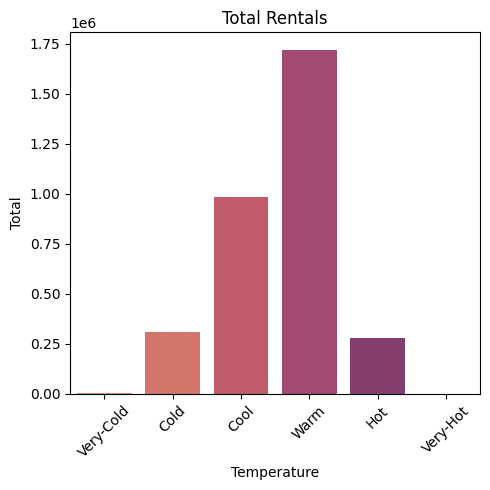

In [320]:
agg6_day_df = day_df.groupby(by="atemp_category", observed=False).agg({
                "cnt": "sum"
            }).reset_index().rename(columns={
                "cnt": "Total"
            })

# Data Visualization
plt.figure(figsize=(5, 5)) # Membuat new figure

# Membuat Bar Chart untuk menampilkan total penyewaan sepeda berdasarkan kondisi suhu udara
sns.barplot(data=agg6_day_df, x="atemp_category", y="Total", hue="atemp_category", palette="flare", legend=False)
plt.title("Total Rentals")
plt.xlabel("Temperature")
plt.ylabel("Total")
plt.xticks(rotation=45)

# Menampilkan grafik
plt.tight_layout()
plt.show()


Berdasarkan grafik di atas, dapat dilihat visualisasi jumlah penyewaan sepeda berdasarkan kondisi suhu udara. Jumlah penyewaan terbanyak yaitu ketika suhu udara "Warm" atau 25 <= atemp <> 35

## Conclusion

- Conclusion pertanyaan 1: Musim berpengaruh terhadap jumlah penyewaan sepeda. Pada musim fall, summer, dan winter, jumlah penyewaan sepeda lebih banyak dibanding pada musim springer. Dengan demikian, dibutuhkan alokasi sumber daya yang lebih besar untuk dapat memenuhi kebutuhan pengguna pada musim tersebut
- Conclusion pertanyaan 2: Pengguna yang melakukan penyewaan sepeda pada "Working Day" sebagian besar merupakan "Registered User". Dengan kata lain, pengguna tersebut merupakan pengguna yang melakukan penyewaan sepeda secara berulang. Pengguna yang tergolong dalam tipe tersebut perlu dijaga kepuasannya (satisfaction) untuk mempertahankan jumlah customer dam retention rate
- Conclusion pertanyaan 3: Kondisi cuaca juga mempengaruhi jumlah penyewaan sepeda. Jumlah penyewaan meningkat ketika kondisi cuaca cerah. Dengan demikian, pada situasi tersebut perlu dipastikan bahwa tersedia alokasi sumber daya yang cukup untuk dapat memenuhi permintaan penyewaan sepeda dari pelanggan
- Conclusion pertanyaan 4: Kondisi dan situasi dimana jumlah penyewaan sepeda paling banyak yaitu terjadi pada season(musim) "fall", weather situation(kondisi cuaca) "clear", dan pukul 17-18. Kondisi atau situasi yang memenuhi kriteria tersebut dapat dioptimalkan untuk meningkatkan jumlah customer dan revenue